In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import math
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.utils import shuffle
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

np.random.seed(42)

In [2]:
iris_data = load_iris() 
x = iris_data.data
y_ = iris_data.target.reshape(-1, 1)

encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

#print(y)

# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)

/home/havish/.local/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [3]:
def relu(x):
    x[x<0]=0
    return x
def softmax(arr):
#     arr = arr/np.max(arr)
    return np.exp(arr)/(np.sum(np.exp(arr),axis=0))
def diff_relu(arr):
    z = np.zeros(arr.shape)
    z[arr<=0] = 0
    z[arr>0] = 1
    return z

In [4]:
def initializer(fan_out,fan_in):
    limit = np.sqrt(2*1.0/(fan_in+fan_out))
#     return np.random.uniform(-limit,limit,(fan_out,fan_in))
    return np.random.normal(0,limit,(fan_out,fan_in))

In [5]:
### architecture ###
in_dim = 4
hid1_dim = 10
hid2_dim = 10
out_dim = 3
W1 = initializer(hid1_dim,in_dim)
b1 = initializer(hid1_dim,1)
W2 = initializer(hid2_dim,hid1_dim)
b2 = initializer(hid2_dim,1)
W3 = initializer(out_dim,hid2_dim)
b3 = initializer(out_dim,1)

In [6]:
epochs = 500
num_samples = len(train_x)
batch_size = 10
num_batches = num_samples/batch_size
alpha = 0.8
eps = 1e-3
loss1 = []
v = {"W1" : np.zeros(W1.shape) , "W2" : np.zeros(W2.shape) ,"W3" : np.zeros(W3.shape),"b1": np.zeros(b1.shape)
     ,"b2" :np.zeros(b2.shape) , "b3" : np.zeros(b3.shape)}
for i in range(epochs):
    (x_train_subs,y_train_subs) = shuffle(train_x,train_y,random_state = 40)
    loss = 0
    for j in range(int(num_batches)):
        W1_upd = np.zeros((hid1_dim,in_dim))
        b1_upd = np.zeros((hid1_dim,1))
        W2_upd = np.zeros((hid2_dim,hid1_dim))
        b2_upd = np.zeros((hid2_dim,1))
        W3_upd = np.zeros((out_dim,hid2_dim))
        b3_upd = np.zeros((out_dim,1))
        for k in range(batch_size):
            z1 = relu(np.matmul(W1,x_train_subs[j+k]).reshape(-1,1)+b1)
        
            z2 = relu(np.matmul(W2,z1).reshape(-1,1)+b2)

            out = softmax(np.matmul(W3,z2).reshape(-1,1) + b3)
        
            loss = loss + -np.log(out[np.argmax(y_train_subs[j+k])])
        
            del_3 = out - y_train_subs[j+k].reshape(-1,1)
            del_2 = np.matmul(W3.T,del_3)*diff_relu(z2)
            del_1 = np.matmul(W2.T,del_2)*diff_relu(z1)

            b3_upd += del_3
#         b3_upd = b3_upd.reshape(len(b3),1)
            b2_upd += del_2
#         b2_upd = b2_upd.reshape(len(b2),1)
            b1_upd += del_1
#         b1_upd = b1_upd.reshape(len(b1),1)
            W3_upd += np.matmul(del_3,z2.T)
            W2_upd += np.matmul(del_2,z1.T)
            W1_upd += np.matmul(del_1,x_train_subs[j+k].reshape(-1,1).T)
        v["W1"] = alpha*v["W1"] - eps*(W1_upd)
        v["W2"] = alpha*v["W2"] - eps*(W2_upd)
        v["W3"] = alpha*v["W3"] - eps*(W3_upd)
        v["b1"] = alpha*v["b1"] - eps*(b1_upd)
        v["b2"] = alpha*v["b2"] - eps*(b2_upd)
        v["b3"] = alpha*v["b3"] - eps*(b3_upd)
        W3 = W3 + v["W3"]
        W2 = W2 + v["W2"]
        W1 = W1 + v["W1"]
        b3 = b3 + v["b3"]
        b2 = b2 + v["b2"]
        b1 = b1 + v["b1"]
    loss1.append(loss)
    print("Epoch: " + str(i) + " Loss: " + str(loss))

Epoch: 0 Loss: [143.77332558]
Epoch: 1 Loss: [82.72312054]
Epoch: 2 Loss: [73.26902841]
Epoch: 3 Loss: [57.10984573]
Epoch: 4 Loss: [46.22196649]
Epoch: 5 Loss: [37.10100866]
Epoch: 6 Loss: [30.54482857]
Epoch: 7 Loss: [26.46165909]
Epoch: 8 Loss: [24.01965873]
Epoch: 9 Loss: [22.82479292]
Epoch: 10 Loss: [22.55725676]
Epoch: 11 Loss: [22.46784211]
Epoch: 12 Loss: [21.49422982]
Epoch: 13 Loss: [19.52063465]
Epoch: 14 Loss: [17.21425034]
Epoch: 15 Loss: [14.9449309]
Epoch: 16 Loss: [13.10970575]
Epoch: 17 Loss: [11.6067648]
Epoch: 18 Loss: [10.38507807]
Epoch: 19 Loss: [9.40494989]
Epoch: 20 Loss: [8.57371471]
Epoch: 21 Loss: [7.87945725]
Epoch: 22 Loss: [7.32659078]
Epoch: 23 Loss: [6.8751372]
Epoch: 24 Loss: [6.50888054]
Epoch: 25 Loss: [6.20930976]
Epoch: 26 Loss: [5.96331445]
Epoch: 27 Loss: [5.76114436]
Epoch: 28 Loss: [5.59995103]
Epoch: 29 Loss: [5.46956528]
Epoch: 30 Loss: [5.37011512]
Epoch: 31 Loss: [5.28491912]
Epoch: 32 Loss: [5.24631648]
Epoch: 33 Loss: [5.18944422]
Epoch: 

Epoch: 284 Loss: [0.28960237]
Epoch: 285 Loss: [0.29927638]
Epoch: 286 Loss: [0.28344703]
Epoch: 287 Loss: [0.29553423]
Epoch: 288 Loss: [0.27716114]
Epoch: 289 Loss: [0.29442568]
Epoch: 290 Loss: [0.27013455]
Epoch: 291 Loss: [0.29081255]
Epoch: 292 Loss: [0.26354373]
Epoch: 293 Loss: [0.2914963]
Epoch: 294 Loss: [0.25615961]
Epoch: 295 Loss: [0.29234231]
Epoch: 296 Loss: [0.24869279]
Epoch: 297 Loss: [0.2934371]
Epoch: 298 Loss: [0.24149959]
Epoch: 299 Loss: [0.29983846]
Epoch: 300 Loss: [0.23415698]
Epoch: 301 Loss: [0.30851423]
Epoch: 302 Loss: [0.2274953]
Epoch: 303 Loss: [0.32166855]
Epoch: 304 Loss: [0.22195163]
Epoch: 305 Loss: [0.33988758]
Epoch: 306 Loss: [0.21796579]
Epoch: 307 Loss: [0.36288238]
Epoch: 308 Loss: [0.21556356]
Epoch: 309 Loss: [0.38798638]
Epoch: 310 Loss: [0.21399756]
Epoch: 311 Loss: [0.40962156]
Epoch: 312 Loss: [0.21233007]
Epoch: 313 Loss: [0.42291583]
Epoch: 314 Loss: [0.21028835]
Epoch: 315 Loss: [0.42843361]
Epoch: 316 Loss: [0.20812474]
Epoch: 317 Lo

In [7]:
z1 = relu(np.matmul(W1,test_x[4]).reshape(-1,1)+b1)
z2 = relu(np.matmul(W2,z1).reshape(-1,1)+b2)
out = softmax(np.matmul(W3,z2).reshape(-1,1) + b3)

In [8]:
print(out)

[[2.94828926e-09]
 [9.99984160e-01]
 [1.58374115e-05]]


In [9]:
print(test_y[4])

[0. 1. 0.]


In [10]:
preds = []
true = []
# print(np.argmax(out))
for i in range(len(test_x)):
    z1 = relu(np.matmul(W1,test_x[i]).reshape(-1,1)+b1)
    z2 = relu(np.matmul(W2,z1).reshape(-1,1)+b2)
    out = softmax(np.matmul(W3,z2).reshape(-1,1) + b3)
    preds.append(np.argmax(out))
    true.append(np.argmax(test_y[i]))

In [11]:
print(preds)

[1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0]


In [12]:
print(true)

[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0]


In [13]:
acc =accuracy_score(y_pred=preds,y_true=true)
print(acc)

0.9666666666666667


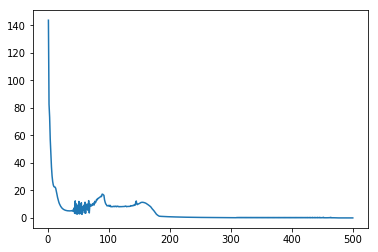

In [14]:
epochs = np.arange(1,501)
plt.plot(epochs,loss1)
plt.show()

In [15]:
for elem in np.array(loss1):
    print(str(elem[0])+',' , end = '')

143.77332557768742,82.72312053868744,73.26902840807718,57.109845731942585,46.221966489403925,37.10100865572896,30.544828571085787,26.461659094295047,24.01965873352157,22.82479291944212,22.5572567614594,22.46784211274613,21.494229817473695,19.52063464819355,17.214250335435718,14.944930900138154,13.10970574707526,11.606764800277151,10.385078065701837,9.404949885766243,8.573714712233022,7.87945725236165,7.326590779368306,6.8751372021077755,6.508880544597188,6.209309760341711,5.963314448254944,5.761144358344384,5.599951027323506,5.469565284811404,5.370115119481163,5.284919118265292,5.246316479786586,5.189444220434339,5.203266955493111,5.1589246642046165,5.226550171212909,5.176909846528059,5.367950065910637,5.173892500605522,5.740841433458212,4.873419657373369,7.287721045503081,3.37001879046641,12.451524543679561,3.188432397386777,10.197673201211236,2.7511665885707366,9.024843588632875,3.243237866580489,12.049337157963231,2.957495231776355,10.263691580937083,3.297774864967023,11.10365429621